# Missing value treatment

In [1]:
df_train = pd.read_csv("../../data/train.csv")

## 1. Electrical

** Electrical은 데이터 하나가 누락되어 있다. **

##### 결측값 분석

In [2]:
df_train[df_train["Electrical"].isnull()]["SalePrice"]

1379    167500
Name: SalePrice, dtype: int64

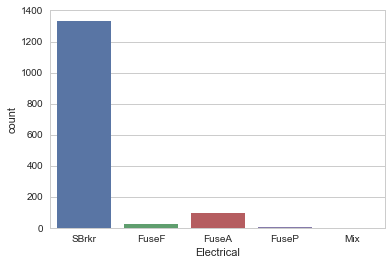

In [3]:
sns.countplot(df_train["Electrical"])

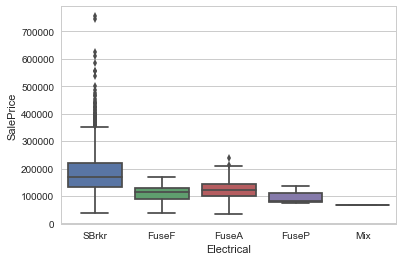

In [4]:
sns.boxplot(x = df_train["Electrical"], y = df_train["SalePrice"])

In [5]:
df_train.groupby(["Electrical"])["SalePrice"].agg(["mean", "std", "median", "max", "min"])

mean           std  median     max    min
Electrical                                                    
FuseA       122196.893617  37511.376615  121250  239000  34900
FuseF       107675.444444  30636.507376  115000  169500  39300
FuseP        97333.333333  34645.827070   82000  137000  73000
Mix          67000.000000           NaN   67000   67000  67000
SBrkr       186825.113193  79856.458326  170000  755000  37900

##### 처리 방안

Electrical 의 분포를 보면 91%가 SBrkr으로 대부분을 SBrkr를 차지하고 있으며, SBrkr의 SalePrice의 median값과 missing value의 SalePrice값이 비슷함으로 SBrkr로 대체한다.

## 2. Veneer

** 베니어가 없는 것이 8개 존재, 베니어가 없는 것도 정보이기 때문에 그대로 둔다. **

## 3. Basement

** 지하실이 없는 곳이 총 37개, 지하실이 없는 것도 정보이기 때문에 그대로 둔다. **

#### 1. 결측값 (BsmtFinType2)

In [6]:
df_train.loc[332][["BsmtCond", "BsmtQual", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1","BsmtFinType2", "BsmtFinSF2"]]

BsmtCond          TA
BsmtQual          Gd
BsmtExposure      No
BsmtFinType1     GLQ
BsmtFinSF1      1124
BsmtFinType2     NaN
BsmtFinSF2       479
Name: 332, dtype: object

BsmtFinSF2를 보면 넓이가 나와 있는 데 Type2에 없다고 잘못 입력

##### 결측값 분석

In [7]:
df_train.loc[332]["SalePrice"]

284000

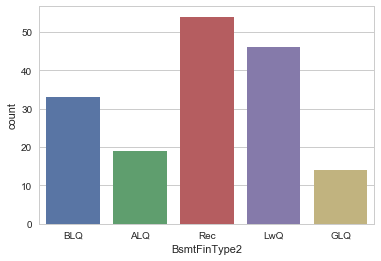

In [8]:
df_notUnf = df_train[df_train["BsmtFinType2"] != "Unf"]["BsmtFinType2"]
sns.countplot(df_notUnf)

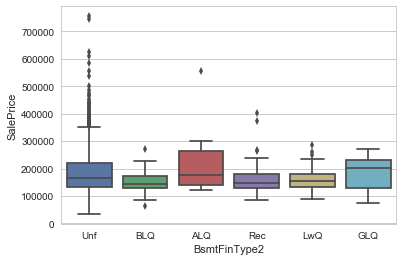

In [9]:
sns.boxplot(x = "BsmtFinType2", y = "SalePrice", data = df_train)

In [10]:
df_train.groupby(["BsmtFinType2"])["SalePrice"].agg(["mean", "std", "median", "max", "min"])

mean            std  median     max     min
BsmtFinType2                                                      
ALQ           209942.105263  104764.743411  174900  555000  123500
BLQ           151101.000000   41611.305388  143000  271900   62383
GLQ           180982.142857   64573.040359  203125  270000   75500
LwQ           164364.130435   43255.035241  154000  287000   88000
Rec           164917.129630   59183.277020  148750  402000   85000
Unf           184694.690287   81275.313909  167000  755000   34900

##### 처리 방안

categorical vlaue를 처리하는 방법으로는 KNN imputation과 최빈값을 넣는 방법이 존재한다. 하지만 KNN은 어려울 것 같고 최빈값은 Unf를 제외한 값을 보면 Rec와 LwQ가 비율이 다르기 때문에 그냥 단순히 제거한다

In [27]:
df_train.BsmtFinType2 = pd.Categorical(df_train.BsmtFinType2)
df_train.BsmtFinType2.cat.codes

0       5
1       5
2       5
3       5
4       5
5       5
6       5
7       1
8       5
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      5
17     -1
18      5
19      5
20      5
21      5
22      5
23      5
24      0
25      5
26      4
27      5
28      5
29      5
       ..
1430    5
1431    5
1432    5
1433    5
1434    5
1435    5
1436    5
1437    5
1438    5
1439    4
1440    5
1441    5
1442    5
1443    5
1444    5
1445    4
1446    5
1447    5
1448    5
1449    5
1450    5
1451    5
1452    5
1453    5
1454    5
1455    5
1456    4
1457    5
1458    4
1459    3
Length: 1460, dtype: int8

#### 2. 결측값 (BsmtExposure)

In [11]:
df_train.loc[948][["BsmtCond", "BsmtQual", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1","BsmtFinType2", "BsmtFinSF2"]]

BsmtCond         TA
BsmtQual         Gd
BsmtExposure    NaN
BsmtFinType1    Unf
BsmtFinSF1        0
BsmtFinType2    Unf
BsmtFinSF2        0
Name: 948, dtype: object

마감되지 않은 지하실이 존재하는 데 Exposure이 지하실이 없다고 잘못 입력

##### 결측값 분석

In [12]:
df_train.loc[948]["SalePrice"]

192500

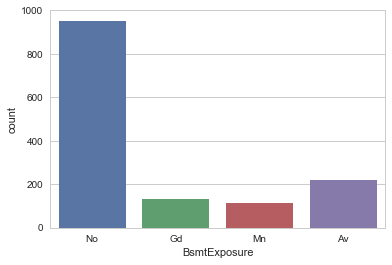

In [13]:
df_notNA = df_train[df_train["BsmtExposure"] != "NA"]["BsmtExposure"]
sns.countplot(df_notNA)

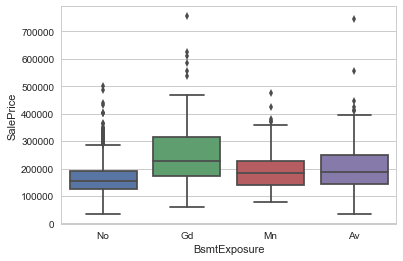

In [14]:
sns.boxplot(x = "BsmtExposure", y = "SalePrice", data = df_train)

In [15]:
df_train.groupby(["BsmtExposure"])["SalePrice"].agg(["mean", "std", "median", "max", "min"])

mean            std  median     max    min
BsmtExposure                                                     
Av            206643.420814   88655.504849  185850  745000  35311
Gd            257689.805970  118923.672583  226975  755000  61000
Mn            192789.657895   77335.442652  182450  475000  78000
No            165652.295908   60695.724915  154000  501837  34900

##### 결측값 처리 방안

BsmtExposure에서 NA를 제외한 값의 분포를 보면 대부분의 값이 No로 측정된다. 그러므로 결측값에 No를 입력한다. 혹은 해당 값을 삭제한다.